In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load all datasets
df_clean = pd.read_csv("/content/covid_19_clean_complete.csv")
df_country = pd.read_csv("/content/country_wise_latest.csv")
df_daywise = pd.read_csv("/content/day_wise.csv")
df_grouped = pd.read_csv("/content/full_grouped.csv")
df_usa = pd.read_csv("/content/usa_county_wise.csv")
df_worldometer = pd.read_csv("/content/worldometer_data.csv")

# Convert 'Date' to datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Viewing and Inspecting Data
print("Dataset Info:")
print(df_clean.info())
print("\nBasic Statistics:")
print(df_clean.describe())
print("\nFirst Few Rows:")
print(df_clean.head())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB
None

Basic Statistics:
                Lat          Long                 Date     Confirmed  \
count  49068.000000  49068.000000                49068  4.906800e+04   
mean

In [9]:
# Check for missing values
print("\nMissing Values:")
print(df_clean.isnull().sum() / len(df_clean) * 100)

# Fill missing values in 'Province/State' with 'Unknown'
df_clean['Province/State'].fillna('Unknown', inplace=True)

# Fill missing values in numerical columns with 0
df_clean.fillna(0, inplace=True)

# Ensure numerical columns are of correct type
num_cols = ['Confirmed', 'Deaths', 'Recovered', 'Active']
df_clean[num_cols] = df_clean[num_cols].astype(int)

# Drop duplicate rows if any
df_clean.drop_duplicates(inplace=True)

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from the dataset
df_cleaned = remove_outliers_iqr(df_clean, num_cols)

# Show summary statistics before and after outlier removal
print("Summary before outlier removal:")
print(df_clean[num_cols].describe())
print("\nSummary after outlier removal:")
print(df_cleaned[num_cols].describe())

# Save the cleaned dataset
df_cleaned.to_csv("/content/Covid_19_clean_complete_final.csv", index=False)
print("Preprocessed data saved to Covid_19_clean_complete_final.csv")

# Load the cleaned dataset and display summary statistics
df_new = pd.read_csv("/content/Covid_19_clean_complete_final.csv")
print(df_new.describe())


Missing Values:
Province/State    0.0
Country/Region    0.0
Lat               0.0
Long              0.0
Date              0.0
Confirmed         0.0
Deaths            0.0
Recovered         0.0
Active            0.0
WHO Region        0.0
dtype: float64
Summary before outlier removal:
          Confirmed         Deaths     Recovered        Active
count  4.906800e+04   49068.000000  4.906800e+04  4.906800e+04
mean   1.688490e+04     884.179160  7.915713e+03  8.085012e+03
std    1.273002e+05    6313.584411  5.480092e+04  7.625890e+04
min    0.000000e+00       0.000000  0.000000e+00 -1.400000e+01
25%    4.000000e+00       0.000000  0.000000e+00  0.000000e+00
50%    1.680000e+02       2.000000  2.900000e+01  2.600000e+01
75%    1.518250e+03      30.000000  6.660000e+02  6.060000e+02
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06

Summary after outlier removal:
          Confirmed        Deaths     Recovered        Active
count  24590.000000  24590.000000  24590.000000  24590.

<ipython-input-9-1a67252be864>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Province/State'].fillna('Unknown', inplace=True)


Preprocessed data saved to Covid_19_clean_complete_final.csv
                Lat          Long     Confirmed        Deaths     Recovered  \
count  24590.000000  24590.000000  24590.000000  24590.000000  24590.000000   
mean      18.332951     17.109144     30.978894      0.790565     21.798414   
std       24.933993     74.302848     53.057482      2.193378     46.981668   
min      -51.796300   -135.000000      0.000000      0.000000      0.000000   
25%        4.860416    -60.978900      0.000000      0.000000      0.000000   
50%       18.042500     17.873900      4.000000      0.000000      0.000000   
75%       37.577700     84.250000     34.000000      0.000000     13.000000   
max       71.706900    178.065000    307.000000     17.000000    225.000000   

             Active  
count  24590.000000  
mean       8.389915  
std       16.519182  
min       -6.000000  
25%        0.000000  
50%        0.000000  
75%        8.000000  
max       80.000000  


In [10]:
df_new.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,24590.000000,24590.000000,24590.000000,24590.000000,24590.000000,24590.000000
mean,18.332951,17.109144,30.978894,0.790565,21.798414,8.389915
std,24.933993,74.302848,53.057482,2.193378,46.981668,16.519182
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.860416,-60.978900,0.000000,0.000000,0.000000,0.000000
50%,18.042500,17.873900,4.000000,0.000000,0.000000,0.000000
75%,37.577700,84.250000,34.000000,0.000000,13.000000,8.000000
max,71.706900,178.065000,307.000000,17.000000,225.000000,80.000000


In [11]:
# Modifying Data
df_new.rename(columns={'Country/Region': 'Country'}, inplace=True)  # Rename column
df_new['Active Cases'] = df_new['Confirmed'] - df_new['Deaths'] - df_new['Recovered']  # New column


# Grouping and Aggregation
country_summary = df_new.groupby('Country')[['Confirmed', 'Deaths', 'Recovered']].sum()
country_summary['Death Rate'] = country_summary['Deaths'] / country_summary['Confirmed']
country_summary['Recovery Rate'] = country_summary['Recovered'] / country_summary['Confirmed']
print("\nCountry Summary:")
print(country_summary.head())


Country Summary:
             Confirmed  Deaths  Recovered  Death Rate  Recovery Rate
Country                                                             
Afghanistan        447       5         11    0.011186       0.024609
Albania            535      15          2    0.028037       0.003738
Algeria            651      45        140    0.069124       0.215054
Andorra            222       0          8    0.000000       0.036036
Angola            3884     220       1144    0.056643       0.294542


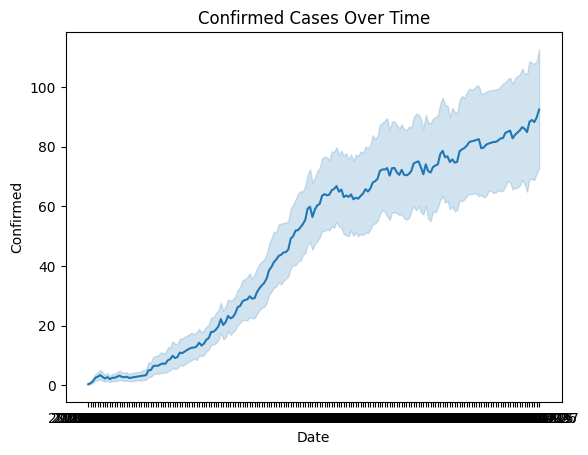

In [18]:
# Visualization
sns.lineplot(x='Date', y='Confirmed', data=df_new)
plt.title('Confirmed Cases Over Time')


plt.show()